### EDA: Twitter Sentiment Analysis 

Sentiment140 dataset with 1.6 million tweets

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative, 4 = positive)

* ids: The id of the tweet ( 2087)

* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

* flag: The query (lyx). If there is no query, then this value is NO_QUERY.

* user: the user that tweeted (robotickilldozr)

* text: the text of the tweet (Lyx is cool)

More Information Can Be Found: [Sentiment140 Kaggle Page](https://www.kaggle.com/datasets/kazanova/sentiment140).

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("sentiment140/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
df.columns = ["label", "time", "date", "query", "username", "text"]

print("Dataset Shape:", df.shape)
print("\nColumns in the dataset:", df.columns)

Dataset Shape: (1599999, 6)

Columns in the dataset: Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 label       0
time        0
date        0
query       0
username    0
text        0
dtype: int64


In [15]:
df.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [17]:
df['label'].unique() 

array([0, 4])

C:\Users\alish\AppData\Local\Temp\ipykernel_16876\4172893916.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['label'][df['label']==4]=1
C:\Users\alish\AppData\Local\Temp\ipykernel_16876\4172893916.py:4: SettingWithCopyWarning: 
A valu


Labels Distribution:
label
1    800000
0    799999
Name: count, dtype: int64


C:\Users\alish\AppData\Local\Temp\ipykernel_16876\4172893916.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis')


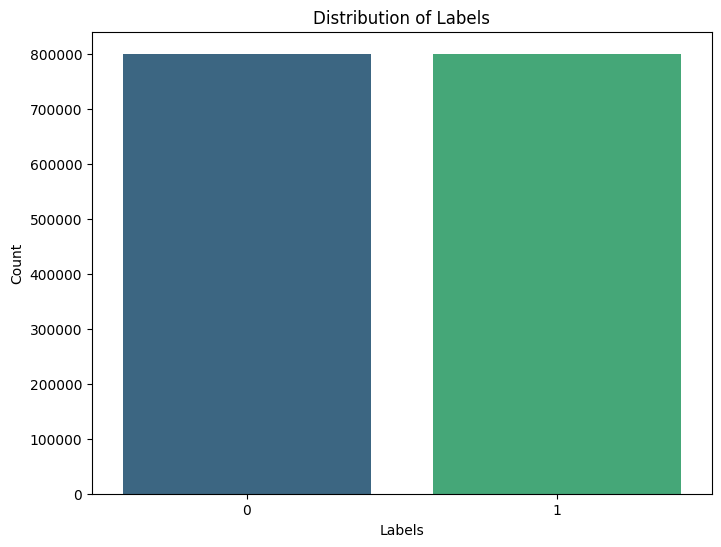

In [18]:
# Assigning 1 to Positive sentment 4
label2name = {0: 'negative', 1: 'positive'}

df['label'][df['label']==4]=1

# Distribution of 'Score' column
print("\nLabels Distribution:")
print(df['label'].value_counts())

# Visualize the score distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='viridis')
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

In [32]:
data_pos = df[df['label'] == 1]
data_neg = df[df['label'] == 0]

# taking half of data so we can run on our machine easily
data_pos = data_pos.sample(frac=1, random_state=42)
data_neg = data_neg.sample(frac=1, random_state=42)

data_pos = data_pos.sample(n=400000, random_state=42)
data_neg = data_neg.sample(n=400000, random_state=42)

balanced_df = pd.concat([data_pos, data_neg])

print(len(data_pos),len(data_neg))

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

split_index = len(balanced_df) // 2
part1 = balanced_df.iloc[:split_index]
part2 = balanced_df.iloc[split_index:]

part1.to_csv('sentiment140/balanced_tweets_part1.csv', index=False)
part2.to_csv('sentiment140/balanced_tweets_part2.csv', index=False)
balanced_df.to_csv('sentiment140/balanced_tweets_800k.csv', index=False)

print(f"Part 1 shape: {part1.shape}, Part 2 shape: {part2.shape}")


400000 400000
Part 1 shape: (400000, 6), Part 2 shape: (400000, 6)


C:\Users\alish\AppData\Local\Temp\ipykernel_16876\3560368342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='label', palette='viridis')


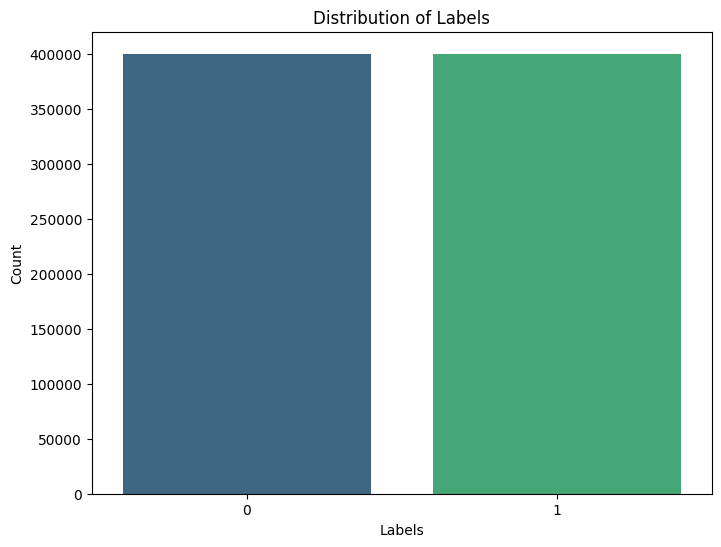

In [33]:
# Visualize the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_df, x='label', palette='viridis')
plt.title("Distribution of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

**Note**: the classes are already initially balanced, which is already good

In [23]:
from wordcloud import WordCloud

In [24]:
grouped_data = balanced_df.groupby('label')

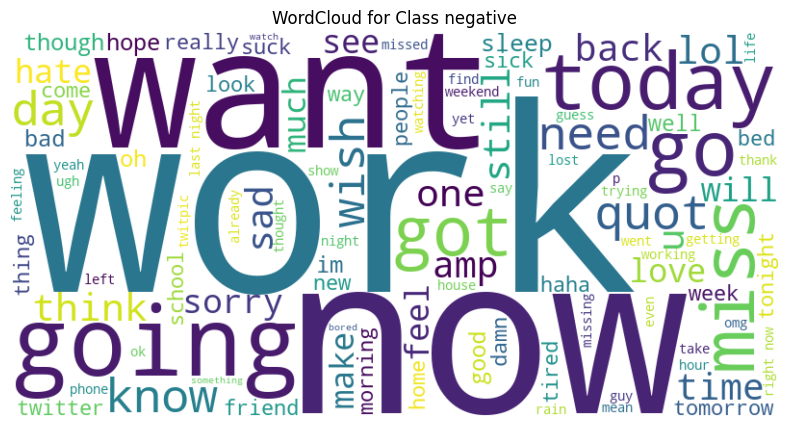

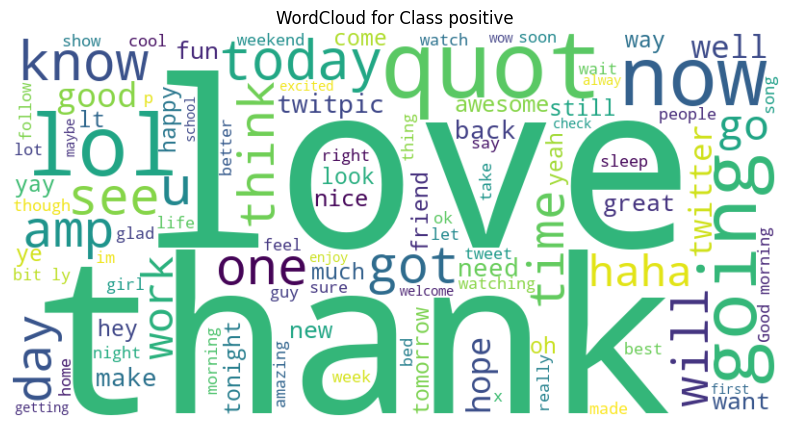

In [25]:
for label, group in grouped_data:
    text = " ".join(group['text'].tolist())

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,  
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Class {label2name[label]}")
    plt.show()

Note: If we look at the word cloud, the frequency of words is not so straightforward. For the Negative class, the most frequent words in tweets are: "work", "want", "now". For the Positive class, the most frequent words are: "Love", "thank", "LOL".

In [28]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
# Character counts
balanced_df["char_count"] = balanced_df["text"].apply(lambda x: len(x))
# Word counts
balanced_df["word_count"] = balanced_df["text"].apply(lambda x: len(x.split()))
# Sentence counts
balanced_df["sent_count"] = balanced_df["text"].apply(lambda x: len(sent_tokenize(x)))
# Average word length
balanced_df["avg_word_len"] = balanced_df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# Average sentence length
balanced_df["avg_sent_len"] = balanced_df["text"].apply(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

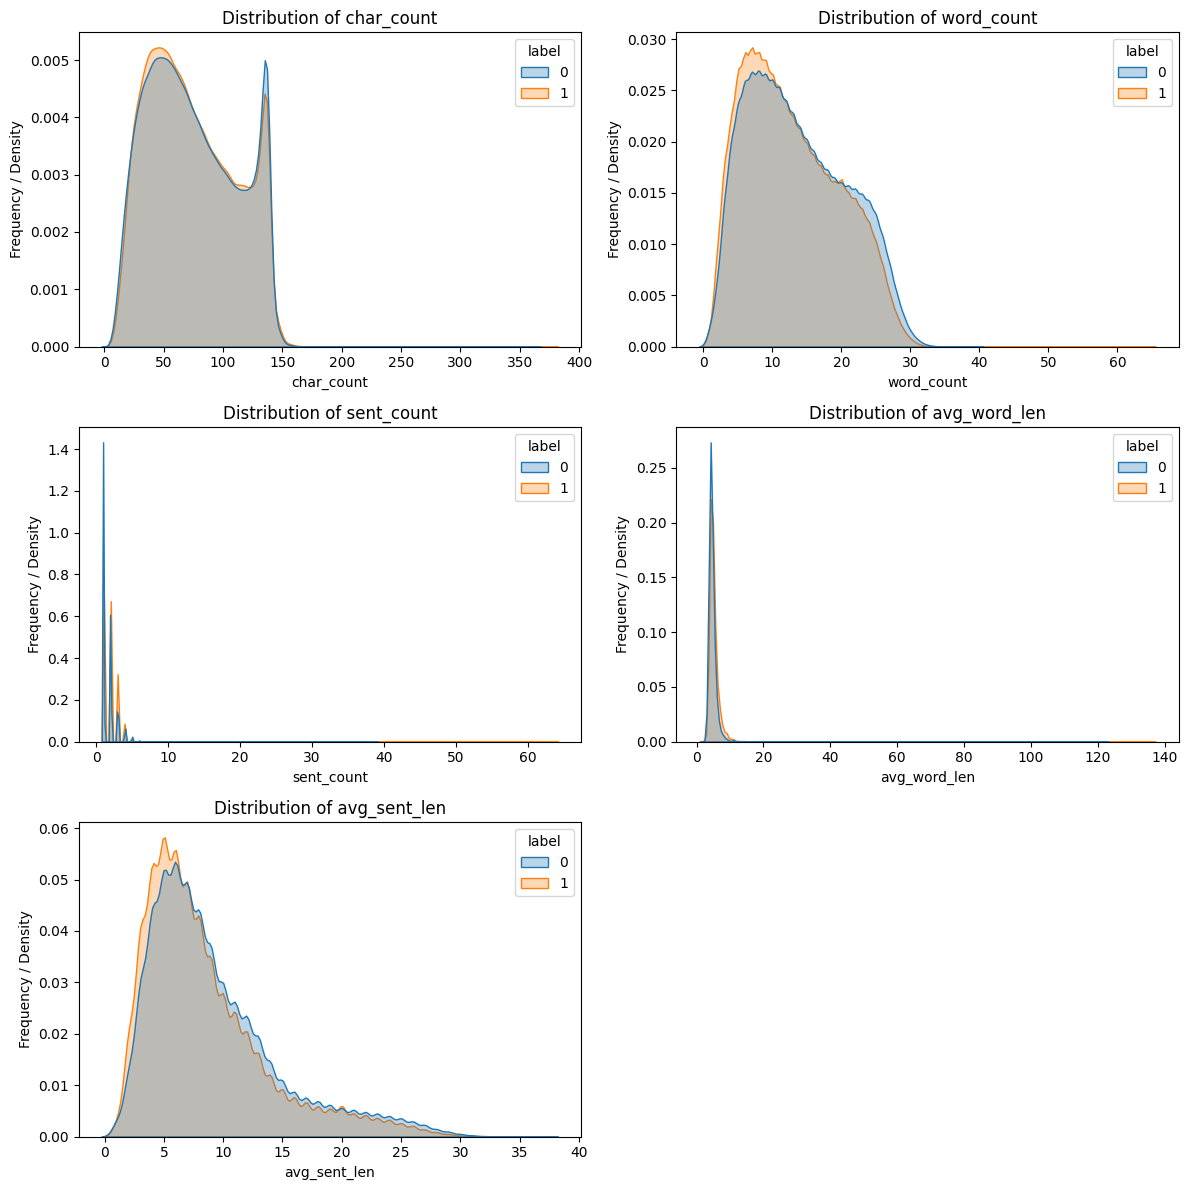

In [30]:
features = ["char_count", "word_count", "sent_count", "avg_word_len", "avg_sent_len"]

n_features = len(features)
n_cols = 2  
n_rows = (n_features + n_cols - 1) // n_cols  #

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4)) 
axes = axes.flatten() 
for i, feature in enumerate(features):
    sns.kdeplot(data=balanced_df, x=feature, hue='label', palette="tab10", ax=axes[i], fill=True, alpha=0.3)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency / Density')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**Note**: Text data have a similar distribution in terms of the number of words and letters, which may indicate that the length of the description is not a criterion that the model can use to differentiate between them.